In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape[0]

60000

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
#performing reshaping (6000, 28, 28, 1) need to feed CNN model as we need to provide channel

x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
x_test = x_test.reshape(x_test.shape[0],28,28, 1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
# Normalization

x_train = x_train / 255
x_test = x_test / 255 #min max 0-1

In [8]:
y_train[0]

5

In [9]:
0,1,2,3,4,5,6,7,8,9

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [10]:
#One hot Encoding--> converting 0,1,2,3,... into (000000..,0000100..,00010000.., etc)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
## y[0]--> 5 as above now in one hot encoded
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# LeNet Model Architecture

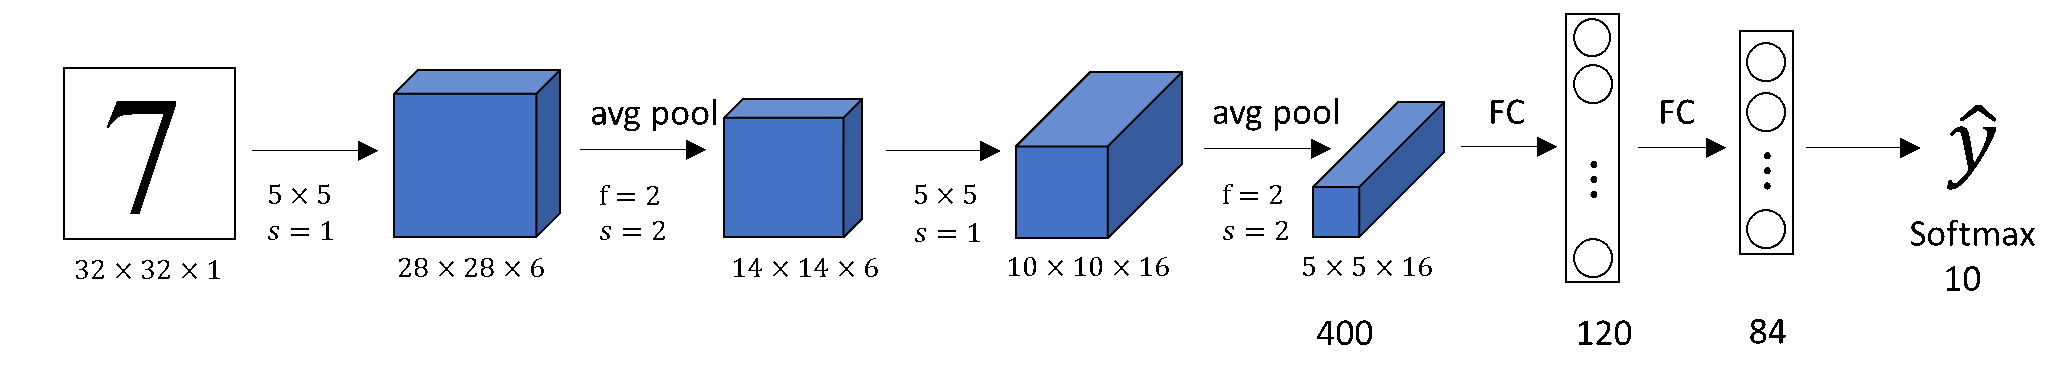

In [16]:
## sequential model --> note input shape is 28x28 not 32x32
model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation='tanh', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation='tanh'))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [17]:
## model accuracy and optimizer
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [18]:
## training the model
model.fit(x_train, y_train, batch_size = 128, epochs=10 , verbose= 1, validation_data = (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 13s 8ms/step - loss: 0.3547 - accuracy: 0.8970 - val_loss: 0.1640 - val_accuracy: 0.9494
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1322 - accuracy: 0.9596 - val_loss: 0.0991 - val_accuracy: 0.9703
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0872 - accuracy: 0.9737 - val_loss: 0.0784 - val_accuracy: 0.9761
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0658 - accuracy: 0.9801 - val_loss: 0.0643 - val_accuracy: 0.9809
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0543 - accuracy: 0.9835 - val_loss: 0.0557 - val_accuracy: 0.9819
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0446 - accuracy: 0.9866 - val_loss: 0.0514 - val_accuracy: 0.9827
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0454 - val_accuracy: 0.9850
Epoch

In [19]:
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9846
Test loss: 0.04728574678301811
Test accuracy: 0.9846000075340271
